Sveučilište u Zagrebu  
Fakultet elektrotehnike i računarstva  
  
## Strojno učenje 2019/2020  
http://www.fer.unizg.hr/predmet/su

------------------------------

### Laboratorijska vježba 1: Regresija

*Verzija: 1.2  
Zadnji put ažurirano: 27. rujna 2019.*

(c) 2015-2019 Jan Šnajder, Domagoj Alagić 

Objavljeno: **30. rujna 2019.**  
Rok za predaju: **21. listopada 2019. u 07:00h**

------------------------------

### Upute

Prva laboratorijska vježba sastoji se od deset zadataka. U nastavku slijedite upute navedene u ćelijama s tekstom. Rješavanje vježbe svodi se na **dopunjavanje ove bilježnice**: umetanja ćelije ili više njih **ispod** teksta zadatka, pisanja odgovarajućeg kôda te evaluiranja ćelija. 

Osigurajte da u potpunosti **razumijete** kôd koji ste napisali. Kod predaje vježbe, morate biti u stanju na zahtjev asistenta (ili demonstratora) preinačiti i ponovno evaluirati Vaš kôd. Nadalje, morate razumjeti teorijske osnove onoga što radite, u okvirima onoga što smo obradili na predavanju. Ispod nekih zadataka možete naći i pitanja koja služe kao smjernice za bolje razumijevanje gradiva (**nemojte pisati** odgovore na pitanja u bilježnicu). Stoga se nemojte ograničiti samo na to da riješite zadatak, nego slobodno eksperimentirajte. To upravo i jest svrha ovih vježbi.

Vježbe trebate raditi **samostalno**. Možete se konzultirati s drugima o načelnom načinu rješavanja, ali u konačnici morate sami odraditi vježbu. U protivnome vježba nema smisla.

In [51]:
# Učitaj osnovne biblioteke...
import numpy as np
import sklearn
import matplotlib.pyplot as plt
%pylab inline

Populating the interactive namespace from numpy and matplotlib


/home/user/anaconda3/lib/python3.7/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['array', 'f', 'clf', 'poly']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


## Zadatci

### 1. Jednostavna regresija

Zadan je skup primjera $\mathcal{D}=\{(x^{(i)},y^{(i)})\}_{i=1}^4 = \{(0,4),(1,1),(2,2),(4,5)\}$. Primjere predstavite matricom $\mathbf{X}$ dimenzija $N\times n$ (u ovom slučaju $4\times 1$) i vektorom oznaka $\textbf{y}$, dimenzija $N\times 1$ (u ovom slučaju $4\times 1$), na sljedeći način:


In [52]:
X = np.array([[0],[1],[2],[4]])
y = np.array([4,1,2,5])

### (a)

Proučite funkciju [`PolynomialFeatures`](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html) iz biblioteke `sklearn` i upotrijebite je za generiranje matrice dizajna $\mathbf{\Phi}$ koja ne koristi preslikavanje u prostor više dimenzije (samo će svakom primjeru biti dodane *dummy* jedinice; $m=n+1$).


In [53]:
from sklearn.preprocessing import PolynomialFeatures

In [54]:
X = np.array([[0],[1],[2],[4]])
poly = PolynomialFeatures(1)
FI = poly.fit_transform(X)
print(FI)

[[1. 0.]
 [1. 1.]
 [1. 2.]
 [1. 4.]]


### (b)

Upoznajte se s modulom [`linalg`](http://docs.scipy.org/doc/numpy/reference/routines.linalg.html). Izračunajte težine $\mathbf{w}$ modela linearne regresije kao $\mathbf{w}=(\mathbf{\Phi}^\intercal\mathbf{\Phi})^{-1}\mathbf{\Phi}^\intercal\mathbf{y}$. Zatim se uvjerite da isti rezultat možete dobiti izračunom pseudoinverza $\mathbf{\Phi}^+$ matrice dizajna, tj. $\mathbf{w}=\mathbf{\Phi}^+\mathbf{y}$, korištenjem funkcije [`pinv`](http://docs.scipy.org/doc/numpy/reference/generated/numpy.linalg.pinv.html).

In [55]:
from numpy import linalg

In [56]:
X = np.array([[0],[1],[2],[4]])
poly = PolynomialFeatures(1)
FI = poly.fit_transform(X)
FI_pseudo = inv(matmul(FI.transpose(), FI))
w = matmul(matmul(FI_pseudo, FI.transpose()), y)
print("{}\n".format(w))

#provjera s linlang.pinv
print(matmul(pinv(FI), y))

[2.2        0.45714286]

[2.2        0.45714286]


Radi jasnoće, u nastavku je vektor $\mathbf{x}$ s dodanom *dummy* jedinicom $x_0=1$ označen kao $\tilde{\mathbf{x}}$.

### (c)

Prikažite primjere iz $\mathcal{D}$ i funkciju $h(\tilde{\mathbf{x}})=\mathbf{w}^\intercal\tilde{\mathbf{x}}$. Izračunajte pogrešku učenja prema izrazu $E(h|\mathcal{D})=\frac{1}{2}\sum_{i=1}^N(\tilde{\mathbf{y}}^{(i)} - h(\tilde{\mathbf{x}}))^2$. Možete koristiti funkciju srednje kvadratne pogreške [`mean_squared_error`]( http://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html) iz modula [`sklearn.metrics`](http://scikit-learn.org/stable/modules/classes.html#module-sklearn.metrics).

**Q:** Gore definirana funkcija pogreške $E(h|\mathcal{D})$ i funkcija srednje kvadratne pogreške nisu posve identične. U čemu je razlika? Koja je "realnija"?

h(x) = 
[2.2        2.65714286 3.11428571 4.02857143]


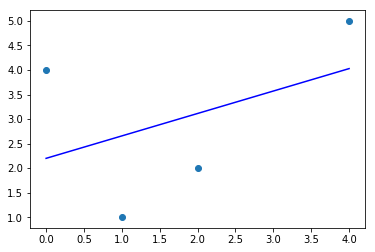

In [57]:
# x sa dummy jedinicama
#X = np.array([[1, 0],[1, 1],[1, 2],[1, 4]])
#treba li ovo?
X = np.array([[0],[1],[2],[4]])
poly = PolynomialFeatures(1)
FI = poly.fit_transform(X)
#izracunaj h(x)
h_x = np.dot(FI, w.transpose())
print("h(x) = \n{}".format(h_x))

plt.scatter(X, y)
plt.plot(X, h_x, 'b-')

In [58]:
from sklearn.metrics import mean_squared_error
#izracunaj pogresku ucenja
E = 1/2 * sum(pow((y - h_x), 2))
print(E)
#pomocu sklearn-a
E = mean_squared_error(y, h_x)
print(E)

4.085714285714285
2.0428571428571427


### (d)

Uvjerite se da za primjere iz $\mathcal{D}$ težine $\mathbf{w}$ ne možemo naći rješavanjem sustava $\mathbf{w}=\mathbf{\Phi}^{-1}\mathbf{y}$, već da nam doista treba pseudoinverz.

**Q:** Zašto je to slučaj? Bi li se problem mogao riješiti preslikavanjem primjera u višu dimenziju? Ako da, bi li to uvijek funkcioniralo, neovisno o skupu primjera $\mathcal{D}$? Pokažite na primjeru.

In [59]:
#w = matmul(inv(FI), y) baca error jer matrica FI nema inverz
print(FI)
print(matrix_rank(FI))
try:
    matmul(inv(FI), y)
except:
    print("Matrica FI nema inverz")

[[1. 0.]
 [1. 1.]
 [1. 2.]
 [1. 4.]]
2
Matrica FI nema inverz


### (e) 

Proučite klasu [`LinearRegression`](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html) iz modula [`sklearn.linear_model`](http://scikit-learn.org/stable/modules/classes.html#module-sklearn.linear_model). Uvjerite se da su težine koje izračunava ta funkcija (dostupne pomoću atributa `coef_` i `intercept_`) jednake onima koje ste izračunali gore. Izračunajte predikcije modela (metoda `predict`) i uvjerite se da je pogreška učenja identična onoj koju ste ranije izračunali.

In [60]:
from sklearn.linear_model import LinearRegression

In [61]:
X = np.array([[0],[1],[2],[4]])
y = np.array([4,1,2,5])
regression = LinearRegression().fit(FI, y)
print("\nkoeficijenti regresije:\n{}".format(regression.coef_))
print("pomak:\n{}".format(regression.intercept_))
y_predicted = regression.predict(FI)
print("\ny predicted:\n{}".format(y_predicted))
E = 1/2 * sum(pow(y - y_predicted, 2))
print("\npogreška:\n{}".format(E))


koeficijenti regresije:
[0.         0.45714286]
pomak:
2.2

y predicted:
[2.2        2.65714286 3.11428571 4.02857143]

pogreška:
4.085714285714286


### 2. Polinomijalna regresija i utjecaj šuma

### (a)

Razmotrimo sada regresiju na većem broju primjera. Definirajte funkciju `make_labels(X, f, noise=0)` koja uzima matricu neoznačenih primjera $\mathbf{X}_{N\times n}$ te generira vektor njihovih oznaka $\mathbf{y}_{N\times 1}$. Oznake se generiraju kao $y^{(i)} = f(x^{(i)})+\mathcal{N}(0,\sigma^2)$, gdje je $f:\mathbb{R}^n\to\mathbb{R}$ stvarna funkcija koja je generirala podatke (koja nam je u stvarnosti nepoznata), a $\sigma$ je standardna devijacija Gaussovog šuma, definirana parametrom `noise`. Za generiranje šuma možete koristiti funkciju [`numpy.random.normal`](https://docs.scipy.org/doc/numpy-1.15.0/reference/generated/numpy.random.normal.html). 

Generirajte skup za učenje od $N=50$ primjera uniformno distribuiranih u intervalu $[-5,5]$ pomoću funkcije $f(x) = 5 + x -2 x^2 -5 x^3$ uz šum  $\sigma=200$:

In [62]:
from numpy.random import normal

def make_labels(X, f, noise=0) :
    y = []
    for i in range(0, np.shape(X)[0]):
        y.append(f(X[i])+normal(scale = noise))
    return np.array(y)
def f(x):
    return 5 + x - 2*pow(x,2) - 5*pow(x,3)

In [63]:
def make_instances(x1, x2, N) :
    return np.array([np.array([x]) for x in np.linspace(x1,x2,N)])
X = make_instances(-5, 5, 50)
y = make_labels(X, f, 200)

Prikažite taj skup funkcijom [`scatter`](http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.scatter).

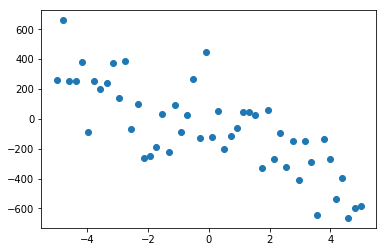

In [64]:
plt.scatter(X, y)

### (b)

Trenirajte model polinomijalne regresije stupnja $d=3$. Na istom grafikonu prikažite naučeni model $h(\mathbf{x})=\mathbf{w}^\intercal\tilde{\mathbf{x}}$ i primjere za učenje. Izračunajte pogrešku učenja modela.

29799.941406440426


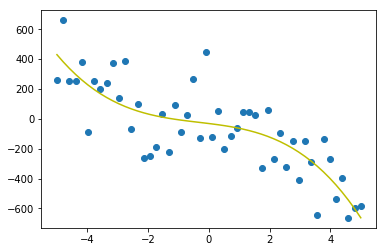

In [65]:
# Vaš kôd ovdje
poly = PolynomialFeatures(3)
FI = poly.fit_transform(X)
#print(FI)

FI_pseudo = inv(matmul(FI.transpose(), FI))
w = matmul(matmul(FI_pseudo, FI.transpose()), y)
#print(w)

h_x = np.dot(FI, w)
#print(h_x)

E = mean_squared_error(y, h_x)
print(E)

plt.scatter(X, y)
plt.plot(X, h_x, 'y-')
show()

### 3. Odabir modela

### (a)

Na skupu podataka iz zadatka 2 trenirajte pet modela linearne regresije $\mathcal{H}_d$ različite složenosti, gdje je $d$ stupanj polinoma, $d\in\{1,3,5,10,20\}$. Prikažite na istome grafikonu skup za učenje i funkcije $h_d(\mathbf{x})$ za svih pet modela (preporučujemo koristiti `plot` unutar `for` petlje). Izračunajte pogrešku učenja svakog od modela.

**Q:** Koji model ima najmanju pogrešku učenja i zašto?

Pogreška modela d=1 iznosi 59477.76636624821

Pogreška modela d=3 iznosi 39534.70650395423

Pogreška modela d=5 iznosi 38873.335089621214

Pogreška modela d=10 iznosi 31489.9479100741

Pogreška modela d=20 iznosi 24010.537286551156



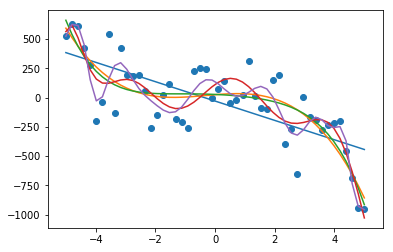

In [66]:
X = make_instances(-5, 5, 50)
y = make_labels(X, f, 200)
for i,j in ((1,0),(3,1),(5,2),(10,3),(20,4)):
    poly = PolynomialFeatures(i)
    FI = poly.fit_transform(X)
    
    FI_pseudo = inv(matmul(FI.transpose(), FI))
    w = matmul(matmul(FI_pseudo, FI.transpose()), y)
    #print(w)

    h_x = np.dot(FI, w)
    #print(h_x)

    E = mean_squared_error(y, h_x)
    print("Pogreška modela d={} iznosi {}\n".format(i,E))
    
    plt.plot(X, h_x)
plt.scatter(X, y)
show()

### (b)

Razdvojite skup primjera iz zadatka 2 pomoću funkcije [`model_selection.train_test_split`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) na skup za učenja i skup za ispitivanje u omjeru 1:1. Prikažite na jednom grafikonu pogrešku učenja i ispitnu pogrešku za modele polinomijalne regresije $\mathcal{H}_d$, sa stupnjem polinoma $d$ u rasponu $d\in [1,2,\ldots,20]$. Budući da kvadratna pogreška brzo raste za veće stupnjeve polinoma, umjesto da iscrtate izravno iznose pogrešaka, iscrtajte njihove logaritme.

**NB:** Podjela na skupa za učenje i skup za ispitivanje mora za svih pet modela biti identična.

**Q:** Je li rezultat u skladu s očekivanjima? Koji biste model odabrali i zašto?

**Q:** Pokrenite iscrtavanje više puta. U čemu je problem? Bi li problem bio jednako izražen kad bismo imali više primjera? Zašto?

In [67]:
from sklearn.model_selection import train_test_split

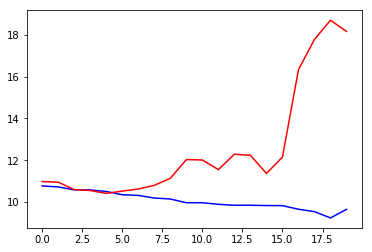

In [68]:
X = make_instances(-5, 5, 50)
y = make_labels(X, f, 200)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5)
E = []
E_test = []
for i in range(1,21):
    poly = PolynomialFeatures(i)
    FI = poly.fit_transform(X_train)
    FI_test = poly.fit_transform(X_test)
    
    w = np.dot(pinv(FI), y_train)
    
    h_x = np.dot(FI, w)
    h_x_test = np.dot(FI_test, w)

    E.append(log(mean_squared_error(y_train, h_x)))
    E_test.append(log(mean_squared_error(y_test, h_x_test)))
    #print("Pogreška učenja modela d={} iznosi {}\n".format(i,E[i-1]))
    #print("Pogreška ispitivanja modela d={} iznosi {}\n".format(i,E_test[i-1]))
    
E = np.array(E)
E_test = np.array(E_test)

plt.plot(E, 'b-')
plt.plot(E_test, 'r-')
show()

### (c)

Točnost modela ovisi o (1) njegovoj složenosti (stupanj $d$ polinoma), (2) broju primjera $N$, i (3) količini šuma. Kako biste to analizirali, nacrtajte grafikone pogrešaka kao u 3b, ali za različit $N\in$ (trećina, dvije trećine, sve) i količine šuma $\sigma\in\{100,200,500\}$ (ukupno 9 grafikona). Upotrijebite funkciju [`subplots`](http://matplotlib.org/examples/pylab_examples/subplots_demo.html) kako biste pregledno posložili grafikone u tablicu $3\times 3$. Podatci se generiraju na isti način kao u zadatku 2.

**NB:** Pobrinite se da svi grafikoni budu generirani nad usporedivim skupovima podataka, na sljedeći način. Generirajte najprije svih 1000 primjera, podijelite ih na skupove za učenje i skupove za ispitivanje (dva skupa od po 500 primjera). Zatim i od skupa za učenje i od skupa za ispitivanje načinite tri različite verzije, svaka s drugačijom količinom šuma (ukupno 2x3=6 verzija podataka). Kako bi simulirali veličinu skupa podataka, od tih dobivenih 6 skupova podataka uzorkujte trećinu, dvije trećine i sve podatke. Time ste dobili 18 skupova podataka -- skup za učenje i za testiranje za svaki od devet grafova.

(3,)


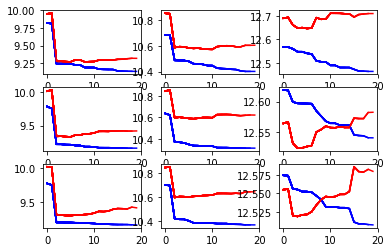

In [69]:
X = make_instances(-5, 5, 1000)
X_train, X_test = train_test_split(X, test_size=0.5)

y_train1 = make_labels(X_train, f, 100)
y_train2 = make_labels(X_train, f, 200)
y_train3 = make_labels(X_train, f, 500)

y_test1 = make_labels(X_test, f, 100)
y_test2 = make_labels(X_test, f, 200)
y_test3 = make_labels(X_test, f, 500)

#############################################
y_train1 = [np.split(y_train1, [int(1/3*len(y_train1))])[0], np.split(y_train1, [int(2/3*len(y_train1))])[0], y_train1]

y_train2 = [np.split(y_train2, [int(1/3*len(y_train2))])[0], np.split(y_train2, [int(2/3*len(y_train2))])[0], y_train2]

y_train3 = [np.split(y_train3, [int(1/3*len(y_train3))])[0], np.split(y_train3, [int(2/3*len(y_train3))])[0], y_train3]

y_train = [y_train1, y_train2, y_train3]
############################################
y_test1 = [np.split(y_test1, [int(1/3*len(y_test1))])[0], np.split(y_test1, [int(2/3*len(y_test1))])[0], y_test1]

y_test2 = [np.split(y_test2, [int(1/3*len(y_test2))])[0], np.split(y_test2, [int(2/3*len(y_test2))])[0], y_test2]

y_test3 = [np.split(y_test3, [int(1/3*len(y_test3))])[0], np.split(y_test3, [int(2/3*len(y_test3))])[0], y_test3]

y_test = [y_test1, y_test2, y_test3]
############################################
x_train = [np.split(X_train, [int(1/3*len(X_train))])[0], np.split(X_train, [int(2/3*len(X_train))])[0], X_train]

x_test = [np.split(X_test, [int(1/3*len(X_test))])[0], np.split(X_test, [int(2/3*len(X_test))])[0], X_test]
print(shape(x_train))
############################################
fig, axs = plt.subplots(3, 3)
for i in range(3):
    for j in range(3):
        E = []
        E_test = []
        for k in range(1,21):
            poly = PolynomialFeatures(k)
            FI = poly.fit_transform(x_train[i])
            FI_test = poly.fit_transform(x_test[i])

            w = np.dot(pinv(FI), y_train[j][i])

            h_x = np.dot(FI, w)
            h_x_test = np.dot(FI_test, w)

            E.append(log(mean_squared_error(y_train[j][i], h_x)))
            E_test.append(log(mean_squared_error(y_test[j][i], h_x_test)))
            
            axs[i, j].plot(np.array(E), 'b-')
            axs[i, j].plot(np.array(E_test), 'r-')
            #print("Pogreška učenja modela d={} iznosi {}\n".format(k,E[k-1]))
            #print("Pogreška ispitivanja modela d={} iznosi {}\n".format(k,E_test[k-1]))

        E = np.array(E)
        E_test = np.array(E_test)

        #plt.plot(E, 'b-')
        #plt.plot(E_test, 'r-')
        #show()

***Q:*** Jesu li rezultati očekivani? Obrazložite.

### 4. Regularizirana regresija

### (a)

U gornjim eksperimentima nismo koristili **regularizaciju**. Vratimo se najprije na primjer iz zadatka 1. Na primjerima iz tog zadatka izračunajte težine $\mathbf{w}$ za polinomijalni regresijski model stupnja $d=3$ uz L2-regularizaciju (tzv. *ridge regression*), prema izrazu $\mathbf{w}=(\mathbf{\Phi}^\intercal\mathbf{\Phi}+\lambda\mathbf{I})^{-1}\mathbf{\Phi}^\intercal\mathbf{y}$. Napravite izračun težina za regularizacijske faktore $\lambda=0$, $\lambda=1$ i $\lambda=10$ te usporedite dobivene težine.

**Q:** Kojih je dimenzija matrica koju treba invertirati?

**Q:** Po čemu se razlikuju dobivene težine i je li ta razlika očekivana? Obrazložite.

In [70]:
X = np.array([[0],[1],[2],[4]])
y = np.array([4,1,2,5])
poly = PolynomialFeatures(3)
FI = poly.fit_transform(X)
I = np.identity(4)
I[0][0] = 0
#print(FI)
for lam in (0,1,10):
    w = matmul(inv(matmul(FI.transpose(), FI) + np.dot(lam, I)), np.dot(FI.transpose(), y))
    print(w)
    #h_x = np.dot(FI, w)
    #print(h_x)

[ 4.         -5.91666667  3.375      -0.45833333]
[ 3.05696145 -0.69079365 -0.2831746   0.1445805 ]
[ 2.49444184 -0.15897295 -0.13423067  0.0815601 ]


### (b)

Proučite klasu [`Ridge`](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html#sklearn.linear_model.Ridge) iz modula [`sklearn.linear_model`](http://scikit-learn.org/stable/modules/classes.html#module-sklearn.linear_model), koja implementira L2-regularizirani regresijski model. Parametar $\alpha$ odgovara parametru $\lambda$. Primijenite model na istim primjerima kao u prethodnom zadatku i ispišite težine $\mathbf{w}$ (atributi `coef_` i `intercept_`).

**Q:** Jesu li težine identične onima iz zadatka 4a? Ako nisu, objasnite zašto je to tako i kako biste to popravili.

In [71]:
from sklearn.linear_model import Ridge

In [72]:
for lam in (0,1,10):
    ridgeRegression = Ridge(lam).fit(FI,y)
    print("\nkoeficijenti regresije:\n{}".format(ridgeRegression.coef_))
    print("pomak:\n{}".format(ridgeRegression.intercept_))


koeficijenti regresije:
[ 0.         -5.91666667  3.375      -0.45833333]
pomak:
4.000000000000025

koeficijenti regresije:
[ 0.         -0.69079365 -0.2831746   0.1445805 ]
pomak:
3.0569614512471652

koeficijenti regresije:
[ 0.         -0.15897295 -0.13423067  0.0815601 ]
pomak:
2.4944418431229733


### 5. Regularizirana polinomijalna regresija

### (a)

Vratimo se na slučaj $N=50$ slučajno generiranih primjera iz zadatka 2. Trenirajte modele polinomijalne regresije $\mathcal{H}_{\lambda,d}$ za $\lambda\in\{0,100\}$ i $d\in\{2,10\}$ (ukupno četiri modela). Skicirajte pripadne funkcije $h(\mathbf{x})$ i primjere (na jednom grafikonu; preporučujemo koristiti `plot` unutar `for` petlje).

**Q:** Jesu li rezultati očekivani? Obrazložite.

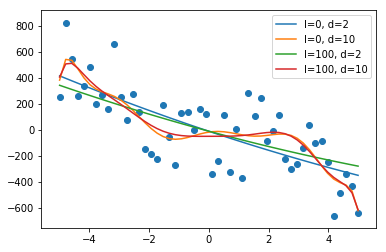

In [73]:
X = make_instances(-5, 5, 50)
y = make_labels(X, f, 200)
for lam in (0,100):
    for d in (2,10):
        poly = PolynomialFeatures(d)
        FI = poly.fit_transform(X)
        ridgeRegression = Ridge(lam).fit(FI,y)
        y_predicted = ridgeRegression.predict(FI)
        plt.plot(X, y_predicted, label="l={}, d={}".format(lam, d))
plt.scatter(X,y)
plt.legend()


### (b)

Kao u zadataku 3b, razdvojite primjere na skup za učenje i skup za ispitivanje u omjeru 1:1. Prikažite krivulje logaritama pogreške učenja i ispitne pogreške u ovisnosti za model $\mathcal{H}_{d=10,\lambda}$, podešavajući faktor regularizacije $\lambda$ u rasponu $\lambda\in\{0,1,\dots,50\}$.

**Q:** Kojoj strani na grafikonu odgovara područje prenaučenosti, a kojoj podnaučenosti? Zašto?

**Q:** Koju biste vrijednosti za $\lambda$ izabrali na temelju ovih grafikona i zašto?


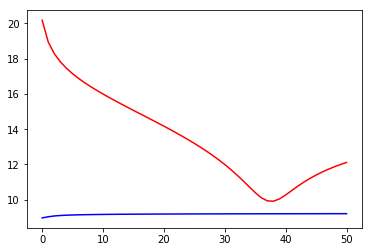

In [74]:
X = make_instances(-5, 5, 50)
y = make_labels(X, f, 100)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5)
E = []
E_test = []
poly = PolynomialFeatures(10)
FI = poly.fit_transform(X_train)
FI_test = poly.fit_transform(X_test)
#print(FI)
#print(FI_test)
I = np.identity(11)
I[0][0] = 0
for i in range(51):
    
    regression = Ridge(i).fit(FI, y_train)
    
    y_predict = regression.predict(FI)
    y_predict_test = regression.predict(FI_test)
    
    #w = matmul(inv(matmul(FI.transpose(), FI) + np.dot(lam, I)), np.dot(FI.transpose(), y_train))
    
    #h_x = np.dot(FI, w)
    #h_x_test = np.dot(FI_test, w)

    #E.append(log(mean_squared_error(y_train, h_x)))
    #E_test.append(log(mean_squared_error(y_test, h_x_test)))
    
    E.append(log(mean_squared_error(y_train, y_predict)))
    E_test.append(log(mean_squared_error(y_test, y_predict_test)))
    
#E = np.array(E)
#E_test = np.array(E_test)

plt.plot(E, 'b-')
plt.plot(E_test, 'r-')
show()

### 6. L1-regularizacija i L2-regularizacija

Svrha regularizacije jest potiskivanje težina modela $\mathbf{w}$ prema nuli, kako bi model bio što jednostavniji. Složenost modela može se okarakterizirati normom pripadnog vektora težina $\mathbf{w}$, i to tipično L2-normom ili L1-normom. Za jednom trenirani model možemo izračunati i broj ne-nul značajki, ili L0-normu, pomoću sljedeće funkcije koja prima vektor težina $\mathbf{w}$:

In [75]:
def nonzeroes(coef, tol=1e-6): 
    return len(coef) - len(coef[np.isclose(0, coef, atol=tol)])

### (a)

Za ovaj zadatak upotrijebite skup za učenje i skup za testiranje iz zadatka 3b. Trenirajte modele **L2-regularizirane** polinomijalne regresije stupnja $d=10$, mijenjajući hiperparametar $\lambda$ u rasponu $\{1,2,\dots,100\}$. Za svaki od treniranih modela izračunajte L{0,1,2}-norme vektora težina $\mathbf{w}$ te ih prikažite kao funkciju od $\lambda$. Pripazite što točno šaljete u funkciju za izračun normi.

**Q:** Objasnite oblik obiju krivulja. Hoće li krivulja za $\|\mathbf{w}\|_2$ doseći nulu? Zašto? Je li to problem? Zašto?

**Q:** Za $\lambda=100$, koliki je postotak težina modela jednak nuli, odnosno koliko je model rijedak?

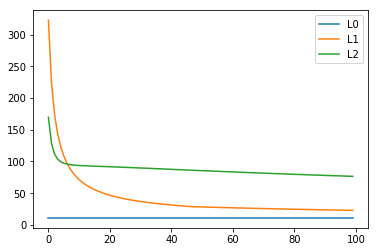

In [76]:
X = make_instances(-5, 5, 50)
y = make_labels(X, f, 200)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5)
poly = PolynomialFeatures(10)
FI = poly.fit_transform(X_train)
FI_test = poly.fit_transform(X_test)

I = np.identity(11)
I[0][0] = 0

L0 = []
L1 = []
L2 = []

def L2Regularizacija(w):
    w2 = matmul(w.transpose(), w)
    L2_1 = []
    for s in w2:
        L2_1.append(s[0])
    return pow(np.array(L2_1), 1/2)

def L1Regularizacija(w):
    return sum(abs(w)) - w[0]
    
for lam in range(1, 101):
    w = matmul(inv(matmul(FI.transpose(), FI) + np.dot(lam, I)), np.dot(FI.transpose(), y_train))
    L0.append(nonzeroes(w))
    L1.append(L1Regularizacija(w))
    L2.append(L2Regularizacija(w))

plt.plot(np.array(L0), label = "L0")
plt.plot(np.array(L1), label = "L1")
plt.plot(np.array(L2), label = "L2")
plt.legend()

### (b)

Glavna prednost L1-regularizirane regresije (ili *LASSO regression*) nad L2-regulariziranom regresijom jest u tome što L1-regularizirana regresija rezultira **rijetkim modelima** (engl. *sparse models*), odnosno modelima kod kojih su mnoge težine pritegnute na nulu. Pokažite da je to doista tako, ponovivši gornji eksperiment s **L1-regulariziranom** regresijom, implementiranom u klasi  [`Lasso`](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lasso.html) u modulu [`sklearn.linear_model`](http://scikit-learn.org/stable/modules/classes.html#module-sklearn.linear_model). Zanemarite upozorenja.

/home/user/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/home/user/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/home/user/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/home/user/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. 

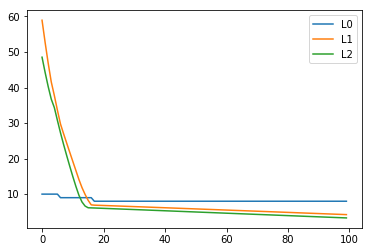

In [77]:
from sklearn import linear_model

X = make_instances(-5, 5, 50)
y = make_labels(X, f, 200)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5)
poly = PolynomialFeatures(10)
FI = poly.fit_transform(X_train)
FI_test = poly.fit_transform(X_test)

I = np.identity(11)
I[0][0] = 0

L0 = []
L1 = []
L2 = []

def L2Regularizacija(w):
    w2 = matmul(w.transpose(), w)
    #L2_1 = []
    #for s in w2:
    #    L2_1.append(s[0])
    return pow(np.array(w2), 1/2)

def L1Regularizacija(w):
    return sum(abs(w)) - w[0]
    
for lam in range(1, 101):
    clf = linear_model.Lasso(alpha=lam).fit(FI, y_train)
    L0.append(nonzeroes(clf.coef_))
    L1.append(L1Regularizacija(clf.coef_))
    L2.append(L2Regularizacija(clf.coef_))

plt.plot(np.array(L0), label = "L0")
plt.plot(np.array(L1), label = "L1")
plt.plot(np.array(L2), label = "L2")
plt.legend()


### 7. Značajke različitih skala

Često se u praksi možemo susreti sa podatcima u kojima sve značajke nisu jednakih magnituda. Primjer jednog takvog skupa je regresijski skup podataka `grades` u kojem se predviđa prosjek ocjena studenta na studiju (1--5) na temelju dvije značajke: bodova na prijamnom ispitu (1--3000) i prosjeka ocjena u srednjoj školi. Prosjek ocjena na studiju izračunat je kao težinska suma ove dvije značajke uz dodani šum.

Koristite sljedeći kôd kako biste generirali ovaj skup podataka.

In [78]:
n_data_points = 500
np.random.seed(69)

# Generiraj podatke o bodovima na prijamnom ispitu koristeći normalnu razdiobu i ograniči ih na interval [1, 3000].
exam_score = np.random.normal(loc=1500.0, scale = 500.0, size = n_data_points) 
exam_score = np.round(exam_score)
exam_score[exam_score > 3000] = 3000
exam_score[exam_score < 0] = 0

# Generiraj podatke o ocjenama iz srednje škole koristeći normalnu razdiobu i ograniči ih na interval [1, 5].
grade_in_highschool = np.random.normal(loc=3, scale = 2.0, size = n_data_points)
grade_in_highschool[grade_in_highschool > 5] = 5
grade_in_highschool[grade_in_highschool < 1] = 1

# Matrica dizajna.
grades_X = np.array([exam_score,grade_in_highschool]).T

# Završno, generiraj izlazne vrijednosti.
rand_noise = np.random.normal(loc=0.0, scale = 0.5, size = n_data_points)
exam_influence = 0.9
grades_y = ((exam_score / 3000.0) * (exam_influence) + (grade_in_highschool / 5.0) \
            * (1.0 - exam_influence)) * 5.0 + rand_noise
grades_y[grades_y < 1] = 1
grades_y[grades_y > 5] = 5

**a)** Iscrtajte ovisnost ciljne vrijednosti (y-os) o prvoj i o drugoj značajki (x-os). Iscrtajte dva odvojena grafa.

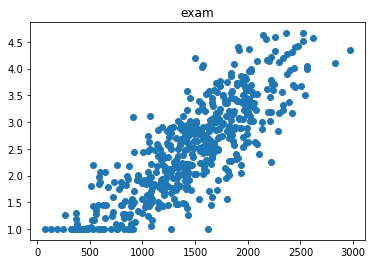

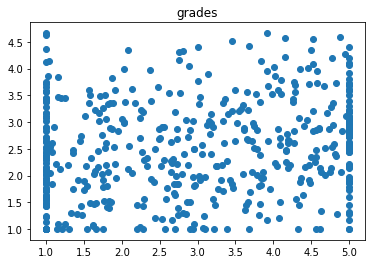

In [79]:
plt.title("exam")
plt.scatter(exam_score, grades_y)
show()
plt.title("grades")
plt.scatter(grade_in_highschool, grades_y)
show()

**b)** Naučite model L2-regularizirane regresije ($\lambda = 0.01$), na podacima `grades_X` i `grades_y`:

In [80]:
regression = Ridge(0.01).fit(grades_X, grades_y)
print(regression.coef_)
print(regression.intercept_)
y_predict = regression.predict(grades_X)

E = mean_squared_error(grades_y, y_predict)
print("Pogreška: {}".format(E))

[0.00141497 0.09477276]
0.15061179575776018
Pogreška: 0.23990435033172808


Sada ponovite gornji eksperiment, ali prvo skalirajte podatke `grades_X` i `grades_y` i spremite ih u varijable `grades_X_fixed` i `grades_y_fixed`. Za tu svrhu, koristite [`StandardScaler`](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html).

In [81]:
from sklearn.preprocessing import StandardScaler

In [82]:
scaler1 = StandardScaler()
grades_X_fixed = scaler1.fit_transform(grades_X, grades_y)
#print(shape(grades_X_fixed))

scaler2 = StandardScaler()
#grades_X_fixed = scaler.transform(grades_X)
grades_y_fixed = scaler2.fit_transform(grades_y.reshape(-1, 1))

regression = Ridge(0.01).fit(grades_X_fixed, grades_y_fixed)
print(regression.coef_)
print(regression.intercept_)
y_predict = regression.predict(grades_X_fixed)

E = mean_squared_error(grades_y_fixed, y_predict)
print("Pogreška: {}".format(E))

[[0.81630375 0.15167761]]
[8.62551331e-17]
Pogreška: 0.29228757017069595


**Q:** Gledajući grafikone iz podzadatka (a), koja značajka bi trebala imati veću magnitudu, odnosno važnost pri predikciji prosjeka na studiju? Odgovaraju li težine Vašoj intuiciji? Objasnite.  

### 8. Multikolinearnost i kondicija matrice

**a)** Izradite skup podataka `grades_X_fixed_colinear` tako što ćete u skupu `grades_X_fixed` iz
zadatka *7b* duplicirati zadnji stupac (ocjenu iz srednje škole). Time smo efektivno uveli savršenu multikolinearnost.

In [83]:
grades_X_fixed_colinear = np.delete(np.append(grades_X_fixed, grades_X_fixed, axis=1), -2, axis=1)
print(shape(grades_X_fixed_colinear))
print(grades_X_fixed_colinear)

(500, 3)
[[ 0.95063817 -0.78607869 -0.78607869]
 [-0.50343434 -0.50193004 -0.50193004]
 [ 1.18596832 -0.52213172 -0.52213172]
 ...
 [-0.31593552  0.80074234  0.80074234]
 [ 0.81288393  1.24783236  1.24783236]
 [-0.01938126  1.21729714  1.21729714]]


Ponovno, naučite na ovom skupu L2-regularizirani model regresije ($\lambda = 0.01$).

In [84]:
poly = PolynomialFeatures(1)
FI = poly.fit_transform(grades_X_fixed_colinear)
regression = Ridge(0.01).fit(FI, grades_y_fixed)
print(regression.coef_)
print(regression.intercept_)
y_predict = regression.predict(FI)

E = mean_squared_error(grades_y, y_predict)
print("Pogreška: {}".format(E))

[[0.         0.81630364 0.07583957 0.07583957]]
[8.07031579e-17]
Pogreška: 6.5113264910699655


**Q:** Usporedite iznose težina s onima koje ste dobili u zadatku *7b*. Što se dogodilo?

**b)** Slučajno uzorkujte 50% elemenata iz skupa `grades_X_fixed_colinear` i naučite dva modela L2-regularizirane regresije, jedan s $\lambda=0.01$ i jedan s $\lambda=1000$). Ponovite ovaj pokus 10 puta (svaki put s drugim podskupom od 50% elemenata).  Za svaki model, ispišite dobiveni vektor težina u svih 10 ponavljanja te ispišite standardnu devijaciju vrijednosti svake od težina (ukupno šest standardnih devijacija, svaka dobivena nad 10 vrijednosti).

In [100]:
from statistics import stdev 
stDev = [[], [], [], [], [], []]
for i in range(10):
    print("\n{}.iteracija".format(i))
    grades_X_1, grades_X_2, grades_y_1, grades_y_2 = train_test_split(grades_X_fixed_colinear, grades_y_fixed, test_size=0.5)
    regression1 = Ridge(0.01).fit(grades_X_1, grades_y_1)
    regression2 = Ridge(1000).fit(grades_X_2, grades_y_2)
    
    print("Lambda = 0.01")
    print(regression1.coef_)
    print(regression1.intercept_)
    #stDev[0].append(regression1.coef_[0])
    #stDev[1].append(regression1.coef_[1])
    #stDev[2].append(regression1.coef_[2])
    
    print("Lambda = 1000")
    print(regression2.coef_)
    print(regression2.intercept_)
    #stDev[3].append(regression2.coef_[0])
    #stDev[4].append(regression2.coef_[1])
    #stDev[5].append(regression2.coef_[2])
    
print("\n\nStandardne devijacije:")
for array in stDev:
    print(stdev(array))
    




0.iteracija
Lambda = 0.01
[[0.81326786 0.06477231 0.06477231]]
[0.02992953]
Lambda = 1000
[[0.17337174 0.04223692 0.04223692]]
[-0.02527575]

1.iteracija
Lambda = 0.01
[[0.81684194 0.08191342 0.08191342]]
[-0.00135672]
Lambda = 1000
[[0.16677368 0.02425855 0.02425855]]
[-0.04218534]

2.iteracija
Lambda = 0.01
[[0.81199112 0.08268912 0.08268912]]
[0.01905011]
Lambda = 1000
[[0.15808115 0.03411068 0.03411068]]
[0.01417744]

3.iteracija
Lambda = 0.01
[[0.81516121 0.0748559  0.0748559 ]]
[-0.01183521]
Lambda = 1000
[[0.16414197 0.03091089 0.03091089]]
[0.02420633]

4.iteracija
Lambda = 0.01
[[0.81516434 0.08681424 0.08681424]]
[-0.01237117]
Lambda = 1000
[[0.16274399 0.03114207 0.03114207]]
[-0.00730932]

5.iteracija
Lambda = 0.01
[[0.83515417 0.08402676 0.08402676]]
[-0.02257877]
Lambda = 1000
[[0.16664543 0.03237301 0.03237301]]
[-0.00378089]

6.iteracija
Lambda = 0.01
[[0.78843211 0.09265718 0.09265718]]
[0.00030962]
Lambda = 1000
[[0.1624221  0.01967554 0.01967554]]
[-0.00917768]

7.i

StatisticsError: variance requires at least two data points

**Q:** Kako regularizacija utječe na stabilnost težina?  
**Q:** Jesu li koeficijenti jednakih magnituda kao u prethodnom pokusu? Objasnite zašto.

**c)** Koristeći [`numpy.linalg.cond`](https://docs.scipy.org/doc/numpy-1.13.0/reference/generated/numpy.linalg.cond.html) izračunajte kondicijski broj matrice $\mathbf{\Phi}^\intercal\mathbf{\Phi}+\lambda\mathbf{I}$, gdje je $\mathbf{\Phi}$ matrica dizajna (`grades_X_fixed_colinear`). Ponovite i za $\lambda=0.01$ i za $\lambda=10$.


In [101]:
matrica = matmul(grades_X_fixed_colinear.transpose(), grades_X_fixed_colinear) + np.dot(0.01, np.identity(shape(grades_X_fixed_colinear)[1]))
print(np.linalg.cond(matrica))

matrica = matmul(grades_X_fixed_colinear.transpose(), grades_X_fixed_colinear) + np.dot(10, np.identity(shape(grades_X_fixed_colinear)[1]))
print(np.linalg.cond(matrica))


100542.86653456726
101.541866534993


**Q:** Kako regularizacija utječe na kondicijski broj matrice $\mathbf{\Phi}^\intercal\mathbf{\Phi}+\lambda\mathbf{I}$?  